![](./src/header.png)


----

# Wprowadzenie

Ten moduł otwierający ma przypomnieć założenia kursu oraz sposób pracy. Zanim zagłębisz się w szczegóły (zespoły, cele, harmonogram), potraktuj tę sekcję jak szybki briefing: sprawdź, czy masz dostęp do materiałów, przeczytaj zasady i przygotuj pytania na pierwsze zajęcia. W kolejnych sekcjach znajdziesz szczegółowe informacje organizacyjne oraz opis zakresu modułów.

### Jak pobrać notatniki z Jupyter Book
Na stronie kursu hostowanej na GitHub Pages (link znajdziesz w repozytorium i na Classroomie) każda lekcja ma wbudowane przyciski pobierania:

- w pasku po prawej stronie kliknij ikonę pobierania i wybierz **.ipynb**, aby ściągnąć interaktywny notatnik do własnego środowiska (np. VS Code, JupyterLab, Colab);
- w tym samym menu możesz wybrać **PDF**, żeby mieć statyczną wersję lekcji, np. do wydruku lub szybkiego przeglądu w terenie;
- pamiętaj, że oba formaty zawierają dokładnie te same przykłady orbit satelitarnych i skrypty, więc zawsze masz offline’ową kopię danych z modułu.

W kolejnych aktualizacjach sekcja download będzie utrzymywana dla wszystkich modułów (Mod0–Mod9) oraz ćwiczeń, żebyś mógł testować kod nawet bez dostępu do internetu na stanowiskach laboratoryjnych.


### Szybki przykład
Poniższy fragment korzysta z biblioteki `skyfield`. Dzięki dwóm liniom [TLE](https://pl.wikipedia.org/wiki/TLE) satelity GALILEO 20 (2C6) możemy w kilka sekund zobaczyć, nad jakimi współrzędnymi pojawi się w kolejnych godzinach UTC.

```python
from skyfield.api import EarthSatellite, load
lines = ("1 40544U 15017D   26046.45277384 -.00000000  00000-0  00000-0 0  9996",
         "2 40544  55.3528 100.4419 0001033 300.8868  59.1327  1.70474466  5466")
ts = load.timescale(); sat = EarthSatellite(*lines, 'GALILEO 20', ts)
times = ts.utc(2024, 2, 9, range(0, 6))
sp = sat.at(times).subpoint()
for t, lat, lon in zip(times.utc_datetime(), sp.latitude.degrees, sp.longitude.degrees):
    print(f"{t:%H:%M} UTC -> lat {lat:.1f}°, lon {lon:.1f}°")
```

Takie mini‑pipeline'y będziesz budować w kolejnych modułach: zaczniemy od podstaw typów i pętli, potem przejdziemy do funkcji, dokumentacji i obsługi wyjątków, by finalnie automatyzować całe procesy analizy danych.

### Wizualizacja przelotu
Aby szybko zobrazować tor lotu na mapie, możesz wykorzystać `Cartopy` i `Matplotlib` – wystarczy przekazać wyliczone współrzędne.

```python
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img(); ax.coastlines()
ax.plot(sp.longitude.degrees, sp.latitude.degrees, 'o-', color='tomato', transform=ccrs.Geodetic())
ax.set_title('GALILEO 20 (2C6) w kolejnych godzinach UTC')
plt.show()
```

W kolejnych modułach wrócimy do takich miniwizualizacji, gdy będziesz tworzyć własne raporty.

In [1]:
from skyfield.api import EarthSatellite, load
lines = ("1 43056U 17079B   26040.43209333  .00000073  00000-0  00000-0 0  9991",
         "2 43056  55.1137 225.0193 0001760 332.5357  27.4555  1.70474585 50820")
ts = load.timescale(); sat = EarthSatellite(*lines, 'GALILEO 20', ts)
times = ts.utc(2024, 2, 9, range(0, 48, 1))
sp = sat.at(times).subpoint()
for t, lat, lon in zip(times.utc_datetime(), sp.latitude.degrees, sp.longitude.degrees):
    print(f"{t:%H:%M} UTC -> lat {lat:.1f}°, lon {lon:.1f}°")

00:00 UTC -> lat 17.4°, lon 119.1°
01:00 UTC -> lat 36.9°, lon 122.8°
02:00 UTC -> lat 51.7°, lon 137.4°
03:00 UTC -> lat 54.6°, lon 165.3°
04:00 UTC -> lat 43.3°, lon -174.2°
05:00 UTC -> lat 25.0°, lon -167.4°
06:00 UTC -> lat 4.3°, lon -166.7°
07:00 UTC -> lat -16.6°, lon -166.8°
08:00 UTC -> lat -36.2°, lon -163.4°
09:00 UTC -> lat -51.3°, lon -149.4°
10:00 UTC -> lat -54.8°, lon -121.7°
11:00 UTC -> lat -43.9°, lon -100.6°
12:00 UTC -> lat -25.8°, lon -93.4°
13:00 UTC -> lat -5.2°, lon -92.6°
14:00 UTC -> lat 15.8°, lon -92.8°
15:00 UTC -> lat 35.5°, lon -89.5°
16:00 UTC -> lat 50.8°, lon -76.1°
17:00 UTC -> lat 54.9°, lon -48.7°
18:00 UTC -> lat 44.5°, lon -27.0°
19:00 UTC -> lat 26.5°, lon -19.4°
20:00 UTC -> lat 6.0°, lon -18.4°
21:00 UTC -> lat -15.0°, lon -18.7°
22:00 UTC -> lat -34.8°, lon -15.7°
23:00 UTC -> lat -50.4°, lon -2.8°
00:00 UTC -> lat -55.0°, lon 24.3°
01:00 UTC -> lat -45.1°, lon 46.6°
02:00 UTC -> lat -27.3°, lon 54.6°
03:00 UTC -> lat -6.8°, lon 55.7°
04:00 U

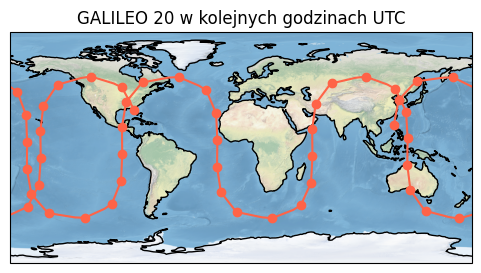

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img(); ax.coastlines()
ax.plot(sp.longitude.degrees, sp.latitude.degrees, 'o-', color='tomato', transform=ccrs.Geodetic())
ax.set_title('GALILEO 20 w kolejnych godzinach UTC')
plt.show()

# Zespół

--- 

| Osoba | Zakres wsparcia i zainteresowania | Kontakt | Dyżur/forma |
| --- | --- | --- | --- |
| dr inż. Małgorzata Jarząbek-Rychard | Python, uczenie maszynowe, AI, chmury punktów, modele 3D; wsparcie dla modułów 1‑8 | <malgorzata.jarzabek-rychard@upwr.edu.pl> | termin konsultacji w przygotowaniu – info na Classroomie |
| dr inż. Radosław Zajdel | Python, analiza danych satelitarnych, GNSS, monitorowanie Ziemi, systemy pozycjonowania na Księżycu i Marsie | <radoslaw.zajdel@upwr.edu.pl> | czwartek 12:00‑14:00 (Google Meet) |

`Google Classroom`: **uxof6vz2** – tam pojawiają się ogłoszenia i listy zadań, dlatego upewnij się, że dołączyłeś przed pierwszymi zajęciami.

Preferowany kanał komunikacji to `Google Classroom` lub e-mail.

## Jaki jest cel tego kursu?
-----

Naszym zadaniem jest przekazać praktyczne podstawy programowania w języku Python tak, aby stały się one solidnym fundamentem do wszystkich kolejnych przedmiotów na kierunku. W dalszych semestrach będziesz pisać kod w modułach dotyczących przetwarzania danych, modelowania, analiz inżynierskich i projektów zespołowych – dlatego kurs ma przygotować Cię do samodzielnego tworzenia i czytania skryptów.

Po ukończeniu kursu powinieneś czuć się pewnie w:
* pisaniu skryptów automatyzujących codzienne zadania inżynierskie,
* tworzeniu prostych narzędzi bez interfejsu graficznego,
* korzystaniu z Pythona jako języka wspierającego raporty, analizy i prototypy (
  zarówno w pracach indywidualnych, jak i projektach zespołowych).

> **Uwaga o asystentach AI:** wiele zadań (zwłaszcza na listach) można rozwiąz
 wsząć z pomocą ChatGPT lub innego wspomagacza. Nie taki jest jednak cel kursu
 Chcemy, abyś zbudował(a) zrozumienie mechanizmów Pythona i nauczył(a) się inter
 pretować kod – dopiero wtedy narzędzia AI będą naprawdę użyteczne. Kartkówki i
 prace sprawdzające będą miały formę krótkich testów albo pisania prostych frag
 mentów kodu na kartce (bez asystentów).


## System pracy i program

---

| Moduł | Zakres | Forma i materiały | Punkty / ocena |
| --- | --- | --- | --- |
| 1 | Przygotowanie środowiska: PowerShell, instalacja pakietów, wirtualne środowiska, praca w Google Colab | warsztat technologiczny + lista kontrolna | zaliczenie / bez punktów |
| 2 | Podstawowe typy danych Pythona, napisy Unicode, sekwencje (`list`, `tuple`, `dict`, `set`), dynamiczne rzutowanie i formatowanie tekstu | ćwiczenia + kartkówka | do 5 pkt |
| 3 | Kontrola przepływu: pakowanie/odpakowywanie sekwencji, instrukcje `if/elif/else`, pętle `for` i `while`, listy/słowniki składane, wprowadzenie `try/except` | ćwiczenia + kartkówka | do 5 pkt |
| 4 | Funkcje i typy mapujące: podpisy z adnotacjami, `*args`/`**kwargs`, dokumentowanie (docstringi, Sphinx), słowniki i walidacja danych, obsługa wyjątków | ćwiczenia + kartkówka | do 5 pkt |
| 5 | Klasy i obiektowość: projektowanie typów, dziedziczenie, dataclasses, podstawowe wzorce projektowe | ćwiczenia + kartkówka | do 5 pkt |
| 6 | Macierze i praca z NumPy | ćwiczenia + kartkówka | do 5 pkt |
| 7 | Analiza danych w Pandas/GeoPandas: selekcja, grupowanie, łączenie danych | ćwiczenia + kartkówka | do 5 pkt |
| 8 | Wizualizacja w Matplotlib: wykresy, mapy, prezentacja wyników | ćwiczenia + kartkówka | do 5 pkt |
| 9 | Tworzenie skryptów konsolowych: argumenty, przetwarzanie wsadowe, pipeline pobierz→przetwarzaj→raportuj | wykład + projekt grupowy | do 5 pkt (projekt) |
| Wykład specjalny | Generatywna sztuczna inteligencja w analizie i pisaniu kodu: modele, prompt engineering i wątki etyczne na przykładach zadań satelitarnych | wykład + live coding | materiały bonusowe / bez punktów |
| Kolokwium | Test z całości materiału | egzamin pisemny | do 10 pkt |

Łącznie zdobywasz punkty modułowe (2–9) oraz wynik z kolokwium końcowego. Każdy moduł rozwija konkretny zestaw umiejętności programistycznych i przygotowuje do dalszych zajęć praktycznych.

## Zasady

---

### Punktacja i przeliczenia
- każda lista zadań jest oddawana na zaliczenie (warunek dopuszczenia do kartkówki), ale sama lista nie generuje punktów;
- punkty zdobywasz podczas zajęć za aktywność: rozwiązanie zadania z listy + wytłumaczenie rozwiązania = 1 pkt aktywności;
- co dwa tygodnie piszemy krótką kartkówkę/test sprawdzający materiał z dwóch poprzednich modułów (max 6 pkt);
- `punkty_modułu = min(6, punkty_test + punkty_aktywnosc)` – nadwyżka nie przechodzi dalej, dlatego warto systematycznie przychodzić na zajęcia i utrzymywać aktywność;
- łączny limit w kursie wynosi 50 pkt: 40 pkt z modułów + 10 pkt z kolokwium końcowego.

### Przygotowanie do ćwiczeń
- przed zajęciami przeczytaj opis listy, skonfiguruj środowisko i pobierz dane; oddanie listy w terminie jest warunkiem podejścia do kartkówki;
- zgłoszenie się i obronienie rozwiązania przy tablicy = 1 pkt do konta modułu (liczone jako punkty aktywności);
- brak przygotowania obniża maksymalny wynik modułu o 0.5 pkt – jeśli masz problem techniczny, zgłoś to wcześniej prowadzącemu.

Checklist przed każdą sesją: (1) środowisko działa, (2) dane pobrane, (3) pytania zapisane w notatniku.

### Kolokwium i zaliczenie
- punkty z aktywności zmniejszają presję na kartkówkach (np. 2 pkt aktywności => musisz uzyskać 4 pkt na kartkówce, by mieć komplet 6);
- kolokwium końcowe obejmuje cały materiał, weryfikuje praktyczne umiejętności pracy z danymi satelitarnymi i decyduje o dodatkowych 15 pkt; brak zaliczonej listy przed kolokwium skutkuje brakiem dopuszczenia;
- ocena końcowa powstaje na podstawie procentu zdobytych punktów: 51-60% → 3.0, ..., 91-100% → 5.0.


## Materiały do wykładów

---

**Podstawy programowania**
- oficjalna dokumentacja: https://www.python.org/doc/
- A. B. Downey, J. Elkner, C. Meyers, *Think Python* (darmowy e-book)
- Swaroop CH, *A Byte of Python* (PL tłumaczenie: http://python.edu.pl/byteofpython/)

**Analiza danych i wizualizacja**
- W. McKinney, *Python for Data Analysis*
- J. VanderPlas, *Python Data Science Handbook* (https://github.com/jakevdp/PythonDataScienceHandbook)
- dokumentacja NumPy / Pandas / Matplotlib linkowana w modułach 5-7

**Dane satelitarne i kontekst kosmiczny**
- Copernicus Open Access Hub / ESA Earth Observation Browser – pozyskiwanie scen Sentinel (używane w modułach 5-7),
- NASA Earthdata + LP DAAC – produkty MODIS i VIIRS,
- CelesTrak oraz Space-Track (TLE) – źródła danych do zadań orbitacyjnych,
- biblioteki `rasterio`, `satpy`, `sgp4` – instalowane z `requirements.txt` i wykorzystywane w przykładach.

**Materiały w repozytorium**
- katalog `src/` zawiera grafiki i przykładowe skrypty (`triangle.py`, `trojmian.py`), z których korzystamy w notatnikach;
- `_images/`, `_static/` i `reports/` przechowują zasoby wykorzystywane przy budowie materiałów – przed dodaniem nowych plików sprawdź, czy nie masz duplikatu.

**Wsparcie online**
- pytania merytoryczne: Stack Overflow (oznacz pytanie tagiem `python`, `geopandas`, `satellite-imagery`),
- organizacja kursu: Google Classroom `uxof6vz2`, gdzie wrzucamy listy zadań, dane do ćwiczeń i aktualizacje.


## Python na rynku pracy
------

- w inżynierii satelitarnej Python wspiera szybkie prototypowanie algorytmów planowania przelotów, analizy NDVI, a także automatyzację naziemnych stacji łączności;
- liczne misje kosmiczne (np. CubeSaty ESA, projekty NASA) publikują narzędzia w Pythonie, więc łatwo rozszerzysz istniejące pipeline'y o własne moduły;
- rośnie zapotrzebowanie na specjalistów łączących analizę danych obserwacji Ziemi z klasycznym przetwarzaniem sygnałów – Python jest wspólnym językiem dla zespołów operacyjnych i badawczych.

Indeks TIOBE (poniżej) potwierdza wysoką pozycję języka: ocenia liczbę aktywnych inżynierów, kursów i dostawców. To dobra wskazówka, że czas poświęcony na kolejne moduły kursu inwestujesz w technologię, której używa branża satelitarna.


### Jak czytać wykres TIOBE
------

Aktualizowany co miesiąc ranking sumuje wyniki wielu wyszukiwarek (Google, Bing, Wikipedia, YouTube, Baidu). Nie mówi on o jakości języka, lecz o jego widoczności i społeczności. Szukając pracy lub praktyk w obszarze Satellite and Space Data Engineering, potraktuj go jako barometr – utrzymywanie się Pythona w czołówce oznacza dużą liczbę projektów misji i bibliotek dostępnych od ręki.


![](./src/Languages.png)

In [3]:
from datetime import date
from platform import python_version

print(f'Witaj w kursie Python! Dzisiejsza data: {date.today():%Y-%m-%d}')
print(f'Używasz wersji Pythona: {python_version()}')
print('Spróbuj zmodyfikować ten komunikat i uruchomić komórkę ponownie.')


Witaj w kursie Python! Dzisiejsza data: 2026-02-16
Używasz wersji Pythona: 3.11.8
Spróbuj zmodyfikować ten komunikat i uruchomić komórkę ponownie.
